In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('SAT_GPA_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [4]:
data.head(10) ##Checking if everything is allright

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


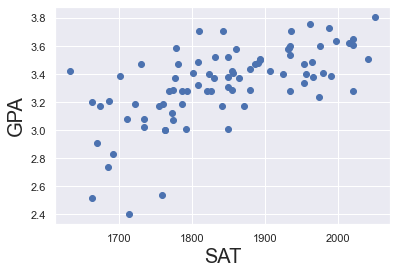

In [5]:
x = data['SAT']
y = data['GPA']
plt.scatter(x,y)                     ## Plotting the points
plt.xlabel('SAT', fontsize=20)       ## Defining the x-label name
plt.ylabel('GPA', fontsize=20)       ## Defining the y-label name
plt.show()  

In [6]:
x1 = sm.add_constant(x) ##Discovering the interception on the graph
model = sm.OLS(y,x1) ## Creating the model
results = model.fit() ##Fitting the model into our data
results.summary() ##Check table with statistical info

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           7.20e-11
Time:                        13:18:43   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

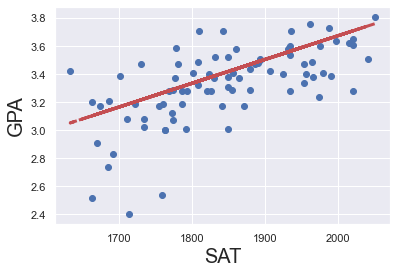

In [7]:
plt.scatter(x,y)                     ## Plotting the points
y_new = 0.0017*x + 0.2750           ## Defining the equation and 
plt.plot(x,y_new, 'r--',lw=3, label='regression line') ## Plotting the line, x is the same for both,
                                                       ## but y_new is the lines predicted by the equation
plt.xlabel('SAT', fontsize=20)       ## Defining the x-label name
plt.ylabel('GPA', fontsize=20)       ## Defining the y-label name
plt.show()  

------------------------------------------------------------------------------------------------------------------

## REGRESSION WITH SKLEARN

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
results = model.fit(x,y)

In [40]:
results.coef_

array([[0.00165569]])

In [41]:
results.intercept_

array([0.2750403])

In [42]:
results.score(x,y)

0.40600391479679765

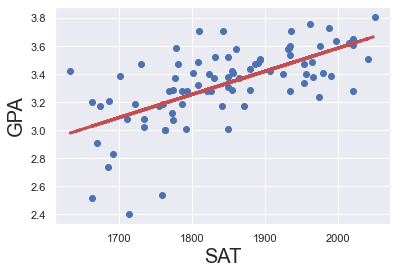

In [43]:
plt.scatter(x,y)                     ## Plotting the points
y_new = 0.00165569*x + 0.2750403            ## Defining the equation and 
plt.plot(x,y_new, 'r--',lw=3, label='regression line') ## Plotting the line, x is the same for both,
                                                       ## but y_new is the lines predicted by the equation
plt.xlabel('SAT', fontsize=20)       ## Defining the x-label name
plt.ylabel('GPA', fontsize=20)       ## Defining the y-label name
plt.show()                           ## Showing the plot, this line will remove, unnecessary text at the top of the graph  

------------------------------------------------------------------------------------------------------------------------

## Regression with Attendance

In [9]:
data = pd.read_csv('SAT_GPA_Attendance.csv')

In [10]:
data.head(10) ##Checking if everything is allright

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [12]:
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0}) ##This will convert our data into 1's and 0's, 
                                                                 ## as yes and no's have no meaning in a regression
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [13]:
x = data[['SAT', 'Attendance']]
y = data['GPA']

------------------------------------------------------------------------------------------------------------------

## WITH STATSMODEL

In [14]:
x1 = sm.add_constant(x) ##Discovering the interception on the graph
model = sm.OLS(y,x1) ## Creating the model
results = model.fit() ##Fitting the model into our data
results.summary() ##Check table with statistical info

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           2.19e-15
Time:                        13:20:38   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

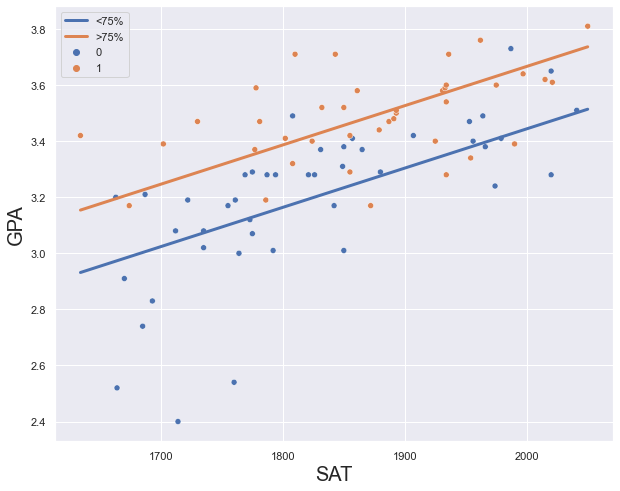

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['SAT'],y=data['GPA'],hue=data['Attendance'])                     ## Plotting the points
y_no = 0.0014*data['SAT'] + 0.6439   ## Defining the equation and 
y_yes = 0.0014*data['SAT'] + 0.8665
sns.lineplot(x=data['SAT'],y=y_no, lw=3, label='<75%')  ## Plotting the line, x is the same for both,
sns.lineplot(x=data['SAT'],y=y_yes, lw=3,  label='>75%') ## but y_new is the lines predicted by the equation
plt.xlabel('SAT', fontsize=20)       ## Defining the x-label name
plt.ylabel('GPA', fontsize=20)       ## Defining the y-label name
plt.show()                           ## Showing the plot, this line will remove, unnecessary text at the top of the graph  

**We can see that the SAT is a good indicator of the GPA of an student after graduation, but we can see that out R^2 is a bit lower, so we may need more variables to perform a better regression**

**Further variables will be added to this dataset to perform a multi variable linear regression**